In [1]:
# --------------------------
# IMPORTS
# --------------------------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# --------------------------
# LOAD DATASET
# --------------------------
df = pd.read_csv('dropout.csv', delimiter=';')

# --------------------------
# DATA CLEANING
# --------------------------
# Check for missing values in the dataset and handle if necessary
missing_values = df.isnull().sum()

df = df[df["Target"] != 'Enrolled']
# --------------------------
# PREPROCESSING
# --------------------------
# Encoding the target variable
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])

# Splitting data into features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [3]:
# --------------------------
# MODEL TRAINING & EVALUATION
# --------------------------

# Dictionary to store F1-scores for each model
f1_scores = {
    "Dropout": [],
   # "Enrolled": [],
    "Graduate": []
}

def print_neat_report(report_dict):
    """
    Prints a neatly formatted classification report.
    
    Parameters:
    - report_dict: Classification report in dictionary format.
    """
    # Header
    print("\n{:<20} {:<10} {:<10} {:<10} {:<10}".format("Class", "Precision", "Recall", "F1-score", "Support"))
    print("-" * 60)
    
    # Report for each class
    for key, value in report_dict.items():
        if key.isdigit():  # Only for the class entries, ignoring 'accuracy', 'macro avg', etc.
            # class_name = "Graduate" if key == "2" else ("Enrolled" if key == "1" else "Dropout")
            class_name = "Graduate" if key == "1" else "Dropout"
            print("{:<20} {:<10.2f} {:<10.2f} {:<10.2f} {:<10}".format(class_name, value['precision'], value['recall'], value['f1-score'], value['support']))
    
    # Overall metrics
    print("\n{:<20} {:<10} {:<10} {:<10} {:<10}".format("Metric", "Precision", "Recall", "F1-score", "Support"))
    print("-" * 60)
    for key in ['macro avg', 'weighted avg']:
        print("{:<20} {:<10.2f} {:<10.2f} {:<10.2f} {:<10}".format(key, report_dict[key]['precision'], report_dict[key]['recall'], report_dict[key]['f1-score'], report_dict[key]['support']))
    print("\nAccuracy:", report_dict['accuracy'])

# Function to train and evaluate a model
def train_and_evaluate_model(model, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_val)
    
    # Append F1-scores to the dictionary
    report = classification_report(y_val, y_pred, output_dict=True)
    f1_scores["Dropout"].append(report['0']['f1-score'])
    f1_scores["Graduate"].append(report['1']['f1-score'])
    #f1_scores["Graduate"].append(report['2']['f1-score'])

    print("\n\n-----", model_name, "-----")
    print_neat_report(report)

In [4]:
# Train and evaluate each model
train_and_evaluate_model(RandomForestClassifier(random_state=42), "RANDOM FOREST")
train_and_evaluate_model(GradientBoostingClassifier(random_state=42), "GRADIENT BOOSTING")
train_and_evaluate_model(SVC(kernel='rbf', random_state=42), "SVM RBF KERNEL")
train_and_evaluate_model(LogisticRegression(max_iter=10000, random_state=42), "LOGISTIC REGRESSION")
train_and_evaluate_model(KNeighborsClassifier(n_neighbors=5), "K-NEAREST NEIGHBORS")
train_and_evaluate_model(DecisionTreeClassifier(random_state=42), "DECISION TREE")
train_and_evaluate_model(MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42), "MULTI-LAYER PERCEPTRON")
train_and_evaluate_model(GaussianNB(), "GAUSSIAN NAIVE BAYES")



----- RANDOM FOREST -----

Class                Precision  Recall     F1-score   Support   
------------------------------------------------------------
Dropout              0.91       0.83       0.86       277.0     
Graduate             0.90       0.95       0.92       449.0     

Metric               Precision  Recall     F1-score   Support   
------------------------------------------------------------
macro avg            0.90       0.89       0.89       726.0     
weighted avg         0.90       0.90       0.90       726.0     

Accuracy: 0.9008264462809917


----- GRADIENT BOOSTING -----

Class                Precision  Recall     F1-score   Support   
------------------------------------------------------------
Dropout              0.90       0.83       0.86       277.0     
Graduate             0.90       0.94       0.92       449.0     

Metric               Precision  Recall     F1-score   Support   
------------------------------------------------------------
macro avg   

KeyError: 'Enrolled'

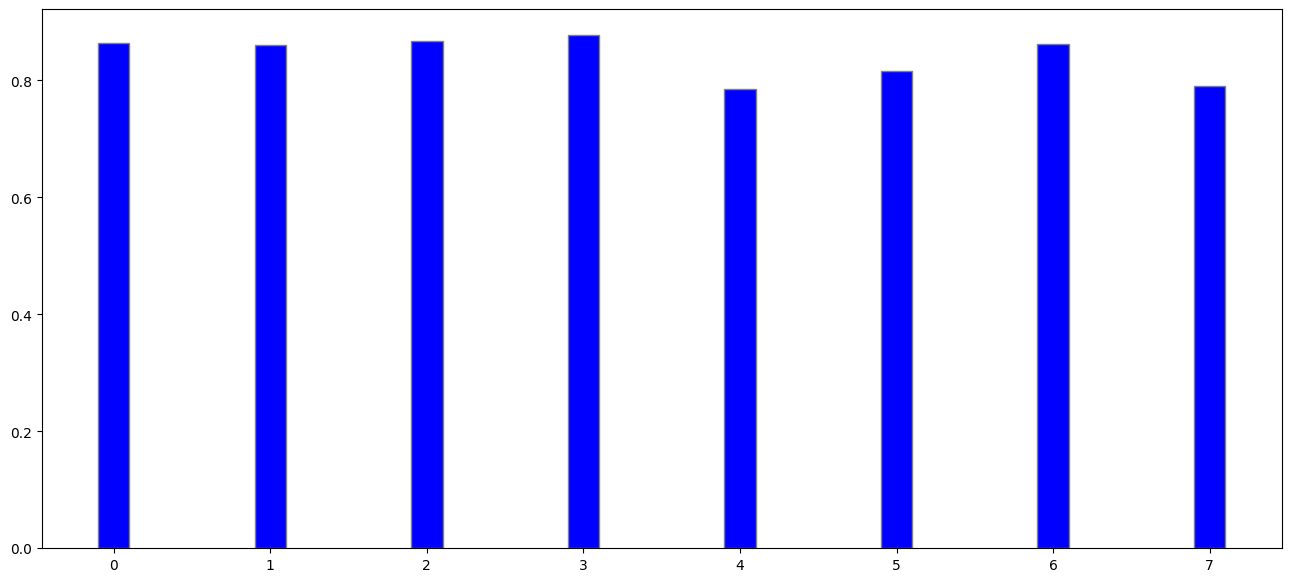

In [5]:

# --------------------------
# COMPARISON VISUALIZATION   
# --------------------------

models = ["Random Forest", "Gradient Boosting", "SVM RBF KERNEL", "Logistic Regression", "K-Nearest Neighbors", "Decision Tree", "Multi-Layer Perceptron", "Gaussian Naive Bayes"]

# Plotting F1-scores across models
bar_width = 0.2
r1 = range(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(16, 7))
plt.bar(r1, f1_scores["Dropout"], width=bar_width, color='blue', edgecolor='grey', label='Dropout')
#plt.bar(r2, f1_scores["Enrolled"], width=bar_width, color='green', edgecolor='grey', label='Enrolled')
plt.bar(r3, f1_scores["Graduate"], width=bar_width, color='magenta', edgecolor='grey', label='Graduate')
plt.title('Comparison of F1-Scores Across Models', fontweight='bold')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('F1-Score', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
